In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import PyDFN3D as dfnpy

work_dir=%pwd
print('Current Workdir=',work_dir)

Current Workdir= F:\PyDFN3D\Examples


In [42]:
Case1=dfnpy.DFN_Model()
#Case1.loadDFN('..\Datas\DFN_2fracs.dat')
#Case1.loadDFN('..\Datas\DFN_4fracs.dat')
#Case1.loadDFN('..\Datas\DFN_4fracs_Well.dat')
Case1.loadDFN('..\Datas\dfnworks_4rects_Well.dat')

[Input] Reading "..\Datas\dfnworks_4rects_Well.dat" DFN file....
Dimension= 3
Number of Points= 25
Number of Fractures= 4
Number of Intersections= 3
Number of Wells= 2
Fracture 0 has Intersections of  [0, 1, 2]
Fracture 1 has Intersections of  [0]
Fracture 2 has Intersections of  [1]
Fracture 3 has Intersections of  [2]


In [43]:
h_mesh_frac=1/4
Case1.setFlowSolver(solver='BEM',h_frac=h_mesh_frac,h_trace=h_mesh_frac)

------------Setting up Fracture 1------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:32(Total) 20(Edge) 12(Trace)
[Mesh] Number of Nodes:96(Total) 60(Edge) 36(Trace) 0(Source)
------------Setting up Fracture 2------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:19(Total) 14(Edge) 4(Trace)
[Mesh] Number of Nodes:55(Total) 42(Edge) 12(Trace) 1(Source)
------------Setting up Fracture 3------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:19(Total) 14(Edge) 4(Trace)
[Mesh] Number of Nodes:55(Total) 42(Edge) 12(Trace) 1(Source)
------------Setting up Fracture 4------------
[Mesh] Genetrated...
[Mesh] Discontinous Element used
[Mesh] Number of boundary elements:19(Total) 14(Edge) 4(Trace)
[Mesh] Number of Nodes:55(Total) 42(Edge) 12(Trace) 1(Source)
Total DOF= 261


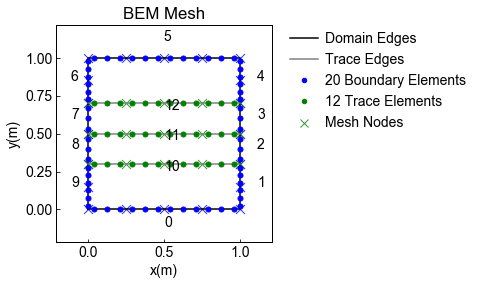

In [44]:
Case1.FlowSolver.showMesh(0)

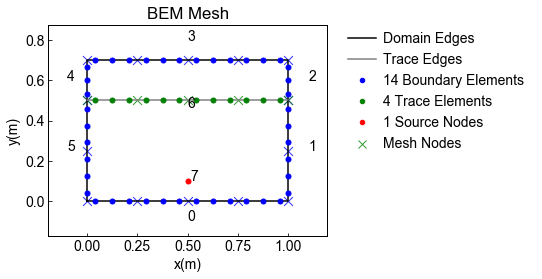

In [45]:
Case1.FlowSolver.showMesh(1)

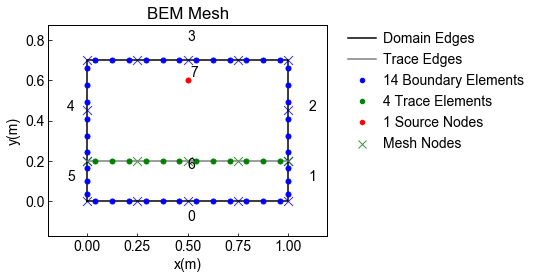

In [46]:
Case1.FlowSolver.showMesh(2)

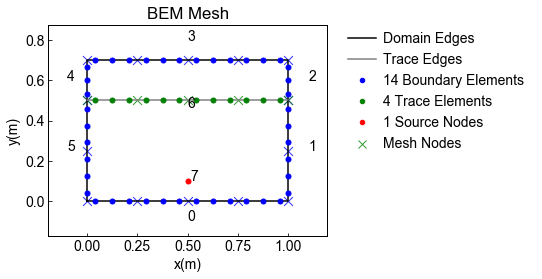

In [47]:
Case1.FlowSolver.showMesh(3)

In [48]:
#PresssureBC=[(10,100.0)]
#Case1.setBoundaryConditions(fracID=0,DirichletBC=PresssureBC)

PresssureBC=[(7,1e6)]
Case1.setBoundaryConditions(fracID=1,DirichletBC=PresssureBC)

PresssureBC=[(7,2e6)]
Case1.setBoundaryConditions(fracID=2,DirichletBC=PresssureBC)

PresssureBC=[(7,1e6)]
Case1.setBoundaryConditions(fracID=3,DirichletBC=PresssureBC)

Case1.setFracProperties(perm=3e-10,aperature=0.01)

[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(7, 1000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(7, 2000000.0)]
[Boundary Condition] BCs set up
[Boundary Condition] Dirichlet BC @ [(7, 1000000.0)]


[Solution] #DOFs= 96
[Solution] #DOFs= 55
[Solution] #DOFs= 55
[Solution] #DOFs= 55
10	0.021310570591455694		alpha:	12402676.991162527
20	0.005132341160101143		alpha:	13869894.220730914
30	0.04261106140569432		alpha:	22747310.961603723
40	0.00020544130705900686		alpha:	67149364.19019872
50	0.0002196702034127075		alpha:	111113569.16456626
60	1.3408578284665043e-05		alpha:	10803357.158309128
70	3.5438867415043786e-07		alpha:	30715413.17019824
80	1.1039042220212476e-06		alpha:	1657830947.567426
90	2.5774766399037406e-10		alpha:	10746778.497199163
Converged at 97 Steps! TOL= 1e-10
Dirichelt [1318018.57165857 1317666.18928904 1317028.52656581 1316232.66498244
 1315482.80874668 1315020.35655318 1315020.35655241 1315482.80874719
 1316232.6649819  1317028.52656637 1317666.18928882 1318018.57165856]
Neumann [-0.00016455 -0.00017025 -0.00018058 -0.00019379 -0.00020653 -0.00021449
 -0.00021449 -0.00020653 -0.00019379 -0.00018058 -0.00017025 -0.00016455]


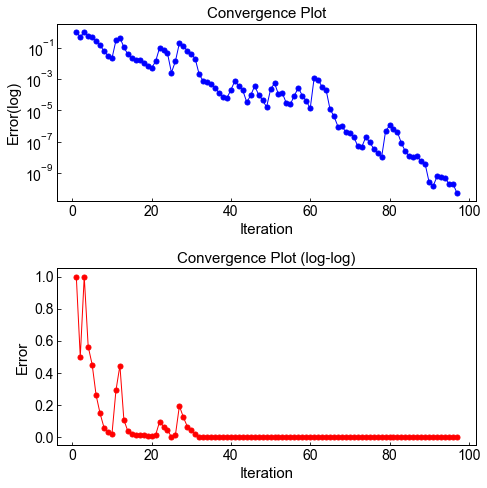

In [49]:
Case1.solveFlow(max_iters=500,tolerance=1e-10)

In [52]:
#Mesh=Case1.writeSolution(mesh_input='..\Datas\DFN_4fracs_Well.msh',fname='DFN_4fracs_Well.vtp')
Mesh=Case1.writeSolution(mesh_input='..\Datas\dfnworks_4rects_gmsh.msh',fname='dfnworks_4rects.vtp')

[Output] Saved VTK mesh and solution file Results\dfnworks_4rects.vtp_solution.vtu) !


### Verification against FEM

In [50]:
import numpy as np
from utils import *
tol=1e-3
Pts1,Pts2=(0.0+tol,0.55),(1.0-tol,0.55)

#BEM Solution
PUV=Case1.FlowSolver.SubProblems[2].PostProcess.plot_Solution_overline(Pts1,Pts2,NumSamples=40,plot=False)

#Get Comsol Data
P_ref = np.genfromtxt('.\\Verification\\dfnworks_4recs_p.csv', comments='%',delimiter=',')
u_ref = np.genfromtxt('.\\Verification\\dfnworks_4recs_u.csv', comments='%',delimiter=',')
v_ref = np.genfromtxt('.\\Verification\\dfnworks_4recs_v.csv', comments='%',delimiter=',')

-----------------Pressure over line-----------------


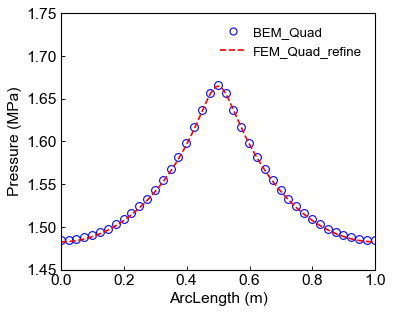

-----------------Velocity U over line-----------------


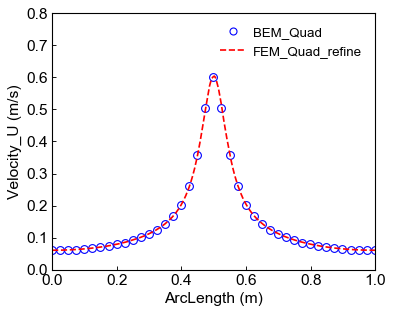

-----------------Velocity V over line-----------------


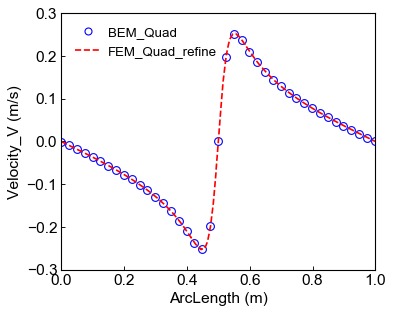

-----------------Velocity Magn over line-----------------


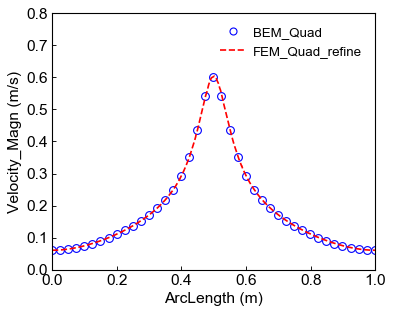

In [51]:
DataSetName=['BEM_Quad','FEM_Quad_refine']
space=1
MPa=1e6
ArcLength=[PUV[::space,0],P_ref[::space,0]]
Pressure=[PUV[::space,1]/MPa,P_ref[::space,1]/MPa]

print("-----------------Pressure over line-----------------")
plotTables(X=ArcLength,Y=Pressure, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Pressure (MPa)',Xlim=[0,1],Ylim=[1.45,1.75],
           MarkerSize=[7,0],LineWidth=[0,1.5],img_fname='Case3_PressureOverLine.pdf')


Velocity=[-PUV[::space,3],u_ref[::space,1]]

print("-----------------Velocity U over line-----------------")
plotTables(X=ArcLength,Y=Velocity, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Velocity_U (m/s)',Xlim=[0,1],Ylim=[0,0.8],
           MarkerSize=[7,0],LineWidth=[0,1.5],img_fname='Case3_VelocityYOverLine_U.pdf')

Velocity=[PUV[::space,2],v_ref[::space,1]]

print("-----------------Velocity V over line-----------------")
plotTables(X=ArcLength,Y=Velocity, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Velocity_V (m/s)',Xlim=[0,1],Ylim=[-0.3,0.3],
           MarkerSize=[7,0],LineWidth=[0,1.5],img_fname='Case3_VelocityYOverLine_V.pdf')

UMag_FEM=np.sqrt(u_ref[:,1]*u_ref[:,1]+v_ref[:,1]*v_ref[:,1])
UMag_BEM=np.sqrt(PUV[:,2]*PUV[:,2]+PUV[:,3]*PUV[:,3])
Velocity=[UMag_BEM[::space],UMag_FEM[::space]]


print("-----------------Velocity Magn over line-----------------")
plotTables(X=ArcLength,Y=Velocity, DataNames=DataSetName,
           XLable='ArcLength (m)',YLabel='Velocity_Magn (m/s)',Xlim=[0,1],Ylim=[0,0.8],
           MarkerSize=[7,0],LineWidth=[0,1.5],img_fname='Case3_VelocityYOverLine.pdf')

In [56]:
Case1.FlowSolver.SubProblems[2].PostProcess.get_BDSolution(7)

IndexError: invalid index to scalar variable.

In [93]:
Case1.FlowSolver.SubProblems[2].get_Solution((0.5,0.5))

(1764705.8823369704, -4.538385837804526e-13, -0.3529411764944523)

In [94]:
Case1.FlowSolver.SubProblems[1].get_Solution((0.5,0.2))

(1117647.0588054599, -3.891909727826714e-13, -0.17647058820819403)

In [95]:
Case1.FlowSolver.SubProblems[3].get_Solution((0.5,0.2))

(1117647.0588054836, 4.2908468458335844e-13, -0.1764705882081352)

[Mesh] State
Number of boundary elements:15
Edge Num.:6
# Neumann-1   Dirichlet-0
(E)Pts	P	Q	U	V
(1)1	1249506.09	0.00	-0.01	-0.00
(1)2	1244495.81	0.00	-0.03	-0.00
(1)3	1233910.38	0.00	-0.05	0.00
(2)4	1216567.65	0.00	-0.08	0.00
(2)5	1190964.06	0.00	-0.11	0.00
(2)6	1161607.15	0.00	-0.08	-0.02
(3)7	1161607.15	0.00	0.08	-0.02
(3)8	1190964.06	0.00	0.11	0.00
(3)9	1216567.65	0.00	0.08	0.00
(4)10	1233910.38	0.00	0.05	-2.43
(4)11	1244495.81	0.00	0.03	-0.00
(4)12	1249506.09	0.00	0.01	-0.00
(5)13	1250728.74	0.00	0.00	0.01
(5)14	1255535.14	0.00	0.00	0.03
(5)15	1264664.51	0.00	-0.00	0.04
(6)16	1277313.16	0.00	0.00	0.05
(6)17	1292513.77	0.00	0.62	0.06
(6)18	1309316.57	0.00	-0.00	0.06
(7)19	1317830.71	0.00	-0.00	-0.00
(7)20	1317538.25	0.00	0.92	-0.00
(7)21	1317405.15	0.00	0.00	-0.00
(8)22	1317360.80	0.00	0.00	-0.00
(8)23	1317155.97	0.00	0.00	0.00
(8)24	1316798.74	0.00	0.00	2.59
(9)25	1316376.83	0.00	0.00	-0.00
(9)26	1316002.46	0.00	0.00	0.00
(9)27	1315782.35	0.00	0.00	0.00
(10)28	1315782.35	0.00	-0.0

In [96]:
-0.17647058820819403+-0.1764705882081352+0.3529411764944523

7.812306357379839e-11

In [82]:
Case1.FracNets.getFracsIntersectTable()

[[0, 1, 5, 5]]

In [83]:
Case1.FracNets.Get3DFracGeo(0)[1]

[array([0.228, 1.   , 1.14 ]), array([0.228, 0.072, 1.14 ])]

In [84]:
Case1.FracNets.Get3DFracGeo(1)[1]

[array([0.228, 1.   , 1.14 ]), array([0.228, 0.072, 1.14 ])]